In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os

print(os.listdir())

species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

print(species.head(), observations.head())

['.ipynb_checkpoints', 'biodiversity.ipynb', 'observations.csv', 'species_info.csv']
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN               scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great S

In [10]:
""" Cleaning and preparation of the species data set. Below I have used comments to highlight
the different steps of my process"""

print(species.info())

# To estimate what the empty values should be replaced with 
unique_cons_status = species.conservation_status.unique()
print(unique_cons_status)

# Replacing null values with 
species["conservation_status"] = species.conservation_status.fillna("No Concern")

# Check for duplicates
species_duplicated = species[species.duplicated()]
print(species_duplicated)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB
None
['No Concern' 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
Empty DataFrame
Columns: [category, scientific_name, common_names, conservation_status]
Index: []


In [30]:
""" Cleaning and preparation of observations data set. Again I have used comments to highlight the 
differet stages of my process """

print(observations.info())

unique_parks = observations.park_name.unique()
print(unique_parks)

# Check for duplicate
observations_duplicated = observations[observations.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Index(['No Concern', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'],
      dtype='object', name='conservation_status')
conservation_status
No Concern            96.566792
Species of Concern     2.855805
Endangered             0.312110
Threatened             0.171660
In Recovery            0.093633
Name: proportion, dtype: float64


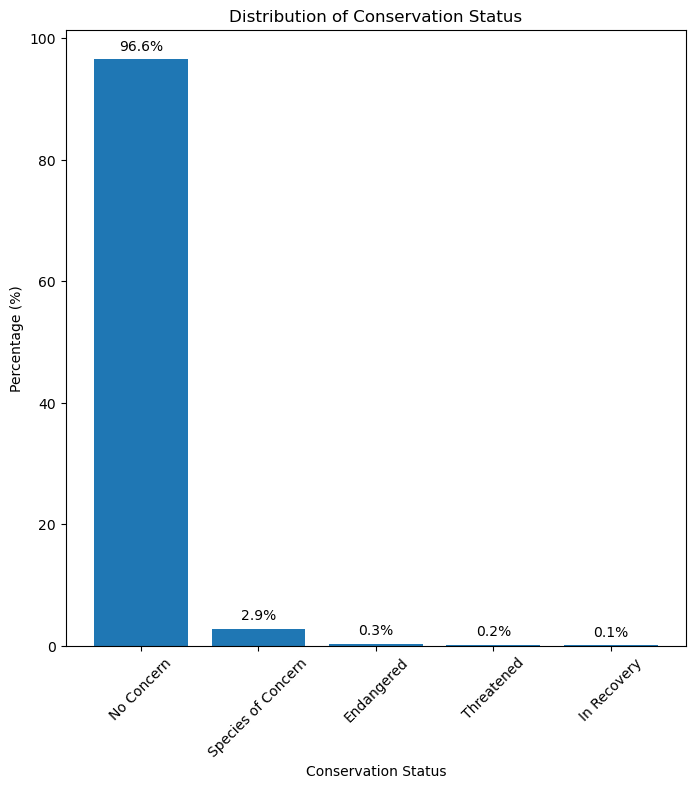

The category most likely to be endangered is 'Mammal' with 3.67% of species being endangered or vulnerable. category
Amphibian            1.219512
Bird                 0.676819
Fish                 2.290076
Mammal               3.666667
Nonvascular Plant         NaN
Reptile                   NaN
Vascular Plant       0.020450
Name: count, dtype: float64


In [34]:
""" In this cell I will visualise the distribution of conservation status, as well as calculate which 
type of species is most likely to be endangered"""
# Check the exact values in conservation_status_dist
print(conservation_status_dist.index)

# Distribution of conservation status 
conservation_status_distribution = detailed_observations['conservation_status'].value_counts(normalize=True) * 100
# Display the distribution as percentages
print(conservation_status_distribution)
# Create the bar chart
plt.figure(figsize=(8, 8))
bars = plt.bar(conservation_status_dist.index, conservation_status_dist)  

# add percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')
plt.title('Distribution of Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  
plt.show()

# Which species is most likeley to be endangered 
endangered_species = detailed_observations[detailed_observations['conservation_status'].isin(['Endangered'])]
# Group by 'category' and count the number of endangered species per category
endangered_counts = endangered_species['category'].value_counts()
# Group by 'category' and count the total number of species per category
total_counts = detailed_observations['category'].value_counts()
# Calculate the proportion of endangered species per category
endangered_proportions = endangered_counts / total_counts * 100
# Sort the proportions to find the category most likely to be endangered
most_likely_endangered_category = endangered_proportions.idxmax()
highest_proportion = endangered_proportions.max()

print(endangered_proportions, f"The category most likely to be endangered is '{most_likely_endangered_category}' with {highest_proportion:.2f}% of species being endangered or vulnerable.")


In [37]:
""" In this cell I use the scipy library to determine if the differences between species and the conservation satus are
statistically significant"""

import scipy.stats as stats

# Create a contingency table for 'category' and 'conservation_status'
contingency_table = pd.crosstab(detailed_observations['scientific_name'], detailed_observations['conservation_status'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("The differences between species and their conservation status are statistically significant.")
else:
    print("The differences between species and their conservation status are not statistically significant.")

Chi-Square Statistic: 89086.47597108771
P-Value: 0.0
Degrees of Freedom: 22160
Expected Frequencies:
[[1.24843945e-02 3.74531835e-03 3.86267166e+00 1.14232210e-01
  6.86641698e-03]
 [1.24843945e-02 3.74531835e-03 3.86267166e+00 1.14232210e-01
  6.86641698e-03]
 [1.24843945e-02 3.74531835e-03 3.86267166e+00 1.14232210e-01
  6.86641698e-03]
 ...
 [1.24843945e-02 3.74531835e-03 3.86267166e+00 1.14232210e-01
  6.86641698e-03]
 [1.24843945e-02 3.74531835e-03 3.86267166e+00 1.14232210e-01
  6.86641698e-03]
 [1.24843945e-02 3.74531835e-03 3.86267166e+00 1.14232210e-01
  6.86641698e-03]]
The differences between species and their conservation status are statistically significant.


In [49]:
""" Now I will look at each park and find the totald sightings for each park, then see which animals are spotted most,
and which animals are spotted least, as well as there category, to see if this reveals any information abut biodiversity
across national parks """
# Group by park name and sum the number of observations
total_sightings_by_park = detailed_observations.groupby('park_name')['observations'].sum()
print(total_sightings_by_park)

# Group by park name and species to get total sightings 
park_species_obs = detailed_observations.groupby(['park_name', 'scientific_name']).agg(
    total_sightings=('observations', 'sum'),
    category=('category', 'first'),
    conservation_status=('conservation_status', 'first')
).reset_index()

# Select most or least seen
most_seen_species = park_species_obs.loc[
    park_species_obs.groupby('park_name')['total_sightings'].idxmax()
]

least_seen_species = park_species_obs.loc[
    park_species_obs.groupby('park_name')['total_sightings'].idxmin()
]

print("\nMost Seen Species in Each Park:")
print(most_seen_species[['park_name', 'scientific_name', 'total_sightings', 'category', 'conservation_status']])

print("\nLeast Seen Species in Each Park:")
print(least_seen_species[['park_name', 'scientific_name', 'total_sightings', 'category', 'conservation_status']])


park_name
Bryce National Park                     633291
Great Smoky Mountains National Park     474863
Yellowstone National Park              1587641
Yosemite National Park                  949452
Name: observations, dtype: int64

Most Seen Species in Each Park:
                                 park_name        scientific_name  \
1359                   Bryce National Park          Columba livia   
10534  Great Smoky Mountains National Park  Streptopelia decaocto   
13534            Yellowstone National Park         Holcus lanatus   
19178               Yosemite National Park   Hypochaeris radicata   

       total_sightings        category conservation_status  
1359              1017            Bird          No Concern  
10534              768            Bird          No Concern  
13534             2415  Vascular Plant          No Concern  
19178             1515  Vascular Plant          No Concern  

Least Seen Species in Each Park:
                                 park_name     scie

Distribution of Conservation Status for Each Park (Percentages):
                                    total_sightings                         \
conservation_status                      Endangered In Recovery No Concern   
park_name                                                                    
Bryce National Park                        0.097743    0.061267  97.061540   
Great Smoky Mountains National Park        0.082761    0.052226  97.301116   
Yellowstone National Park                  0.098133    0.055995  97.191871   
Yosemite National Park                     0.099320    0.061299  97.165418   

                                                                   
conservation_status                 Species of Concern Threatened  
park_name                                                          
Bryce National Park                           2.686127   0.093322  
Great Smoky Mountains National Park           2.471239   0.092658  
Yellowstone National Park                     2.

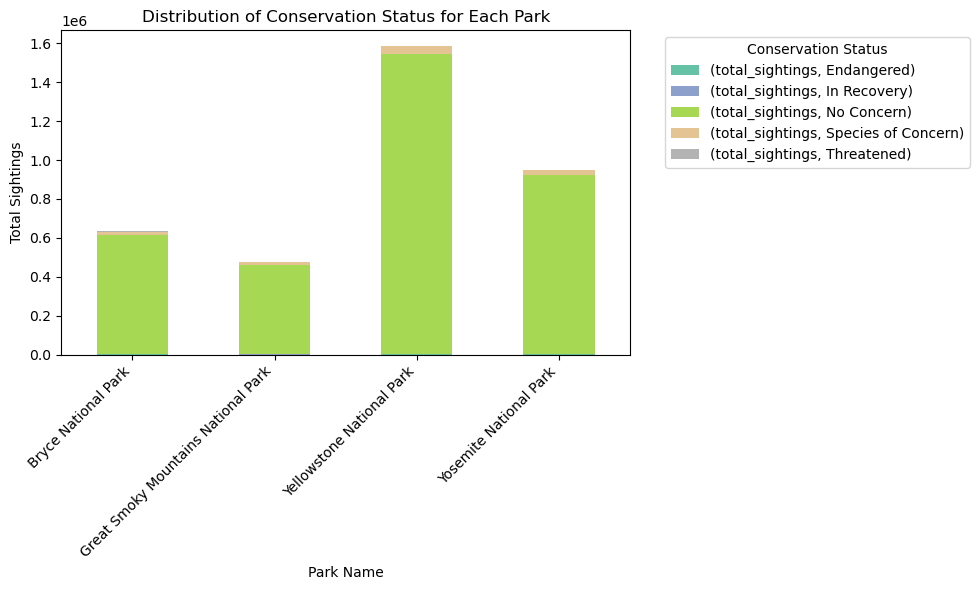

In [44]:
""" Finally I will compare the distribution of conservation status, across the different national parks, and see if 
there are similarities across the parks this may give more insights, about which species are endangered. After that 
I will visualise the findings """

# Group by park and conservation status to get the count of each conservation status per park
conservation_status_distribution = detailed_observations.groupby(['park_name', 'conservation_status']).agg(
    total_sightings=('observations', 'sum')
).unstack(fill_value=0) 

# Calculate the percentage of total sightings for each conservation status in each park
conservation_status_percentage = conservation_status_distribution.div(conservation_status_distribution.sum(axis=1), axis=0) * 100

print("Distribution of Conservation Status for Each Park (Percentages):")
print(conservation_status_percentage)

# Plot the bar chart
ax = conservation_status_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Distribution of Conservation Status for Each Park')
plt.xlabel('Park Name')
plt.ylabel('Total Sightings')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit everything
plt.show()




